<a href="https://colab.research.google.com/github/nirmalghimire/DDP_Achievement-Gap/blob/main/metacognitive_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacognitive Readign Strategies for 15-Year-Old Students Based on PISA 2018 Data

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
!pip install pyreadstat
import pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the SAV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/CY07_MSU_STU_QQQ_1.sav'
mod_data, metadata = pyreadstat.read_sav(file_path)
#print(mod_data.head())

In [ ]:
# Subsetting the Data
# Create a list of columns to keep
columns_to_keep = [col for col in mod_data.columns if col not in mod_data.columns[0:5] and col not in mod_data.columns[63:76]]

# Create the subset DataFrame
data = mod_data[columns_to_keep]

# Now 'data' contains the subset of your original data
print(data.dtypes)
print(data.head())

ST001D01T     float64
ST004D01T     float64
ST153Q01HA    float64
ST153Q02HA    float64
ST153Q03HA    float64
ST153Q04HA    float64
ST153Q05HA    float64
ST153Q06HA    float64
ST153Q08HA    float64
ST153Q09HA    float64
ST153Q10HA    float64
ST160Q01IA    float64
ST160Q02IA    float64
ST160Q05IA    float64
ST175Q01IA    float64
ST161Q01HA    float64
ST164Q01IA    float64
ST164Q02IA    float64
ST164Q03IA    float64
ST164Q04IA    float64
ST164Q05IA    float64
ST164Q06IA    float64
ST165Q01IA    float64
ST165Q02IA    float64
ST165Q03IA    float64
ST165Q04IA    float64
ST165Q05IA    float64
ST166Q01HA    float64
ST166Q02HA    float64
ST166Q03HA    float64
ST166Q04HA    float64
ST166Q05HA    float64
ST182Q03HA    float64
ST182Q04HA    float64
ST208Q01HA    float64
ST208Q02HA    float64
ST208Q04HA    float64
GRADE         float64
MISCED        float64
FISCED        float64
HISEI         float64
DURECEC       float64
REPEAT        float64
TMINS         float64
ESCS          float64
UNDREM    

In [ ]:
# Checking the dimension
print(data.shape)

(612004, 58)


In [ ]:
# Summary of the Variables
print(data.describe())

           ST001D01T      ST004D01T     ST153Q01HA     ST153Q02HA  \
count  612004.000000  612002.000000  568793.000000  566399.000000   
mean       11.077864       1.501704       1.294656       1.260470   
std        11.046151       0.499998       0.455888       0.438892   
min         7.000000       1.000000       1.000000       1.000000   
25%         9.000000       1.000000       1.000000       1.000000   
50%        10.000000       2.000000       1.000000       1.000000   
75%        10.000000       2.000000       2.000000       2.000000   
max        98.000000       2.000000       2.000000       2.000000   

          ST153Q03HA     ST153Q04HA     ST153Q05HA     ST153Q06HA  \
count  565400.000000  565915.000000  565787.000000  564111.000000   
mean        1.428062       1.236069       1.160430       1.538394   
std         0.494798       0.424665       0.367004       0.498524   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.0000

In [ ]:
# Impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(data)
imputed_df = pd.DataFrame(imputed_data, columns=data.columns)

In [ ]:
# Separate the features (X) and the target variable (y)
X = imputed_df.drop(columns=['UNDREM', 'METASUM', 'METASPAM'])
y_undrem = imputed_df['UNDREM']
y_metasum = imputed_df['METASUM']
y_metaspam = imputed_df['METASPAM']

## Splitting the Data in 70-30 Samples

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_undrem_train, y_undrem_test, y_metasum_train, y_metasum_test, y_metaspam_train, y_metaspam_test = train_test_split(
    X, y_undrem, y_metasum, y_metaspam, test_size=0.3, random_state=42)

## Understanding and Remembering

In [ ]:
# Create and train the random forest models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem = RandomForestRegressor(n_estimators=100)
model_undrem.fit(X_train, y_undrem_train)

RandomForestRegressor()

## Summarizing

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum = RandomForestRegressor(n_estimators=100)
model_metasum.fit(X_train, y_metasum_train)

RandomForestRegressor()

## Assessing Credibility

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam = RandomForestRegressor(n_estimators=100)
model_metaspam.fit(X_train, y_metaspam_train)

RandomForestRegressor()

## Validating in the Test Sets

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test data
undrem_predictions = model_undrem.predict(X_test)
metasum_predictions = model_metasum.predict(X_test)
metaspam_predictions = model_metaspam.predict(X_test)

## Calculating Test Statiscis for all Models in Training and Test Data

In [ ]:
# Calculate and print performance metrics for training data
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Mean Squared Error: {mse}")
    print(f"{dataset_type} - Mean Absolute Error: {mae}")
    print(f"{dataset_type} - R-squared Score: {r2}")

# For UNDREM model
print("UNDREM Model:")
print_metrics(model_undrem, X_train, y_undrem_train, "Training")
print_metrics(model_undrem, X_test, y_undrem_test, "Test")

# For METASUM model
print("\nMETASUM Model:")
print_metrics(model_metasum, X_train, y_metasum_train, "Training")
print_metrics(model_metasum, X_test, y_metasum_test, "Test")

# For METASPAM model
print("\nMETASPAM Model:")
print_metrics(model_metaspam, X_train, y_metaspam_train, "Training")
print_metrics(model_metaspam, X_test, y_metaspam_test, "Test")

UNDREM Model:
Training - Mean Squared Error: 0.0008996886493487973
Training - Mean Absolute Error: 0.007265434424542075
Training - R-squared Score: 0.9989679674170202
Test - Mean Squared Error: 0.006452600430155429
Test - Mean Absolute Error: 0.019800027482625986
Test - R-squared Score: 0.9925920111678213

METASUM Model:
Training - Mean Squared Error: 0.0003109635356252627
Training - Mean Absolute Error: 0.002391964544891051
Training - R-squared Score: 0.9996443695745931
Test - Mean Squared Error: 0.0021941011503089805
Test - Mean Absolute Error: 0.006567536955872976
Test - R-squared Score: 0.9974912746865442

METASPAM Model:
Training - Mean Squared Error: 0.0002568206156641414
Training - Mean Absolute Error: 0.002157641377075632
Training - R-squared Score: 0.9996927955901437
Test - Mean Squared Error: 0.0017193377394325506
Test - Mean Absolute Error: 0.005737627643308605
Test - R-squared Score: 0.9979401528383406


## Plotting the Primary Models

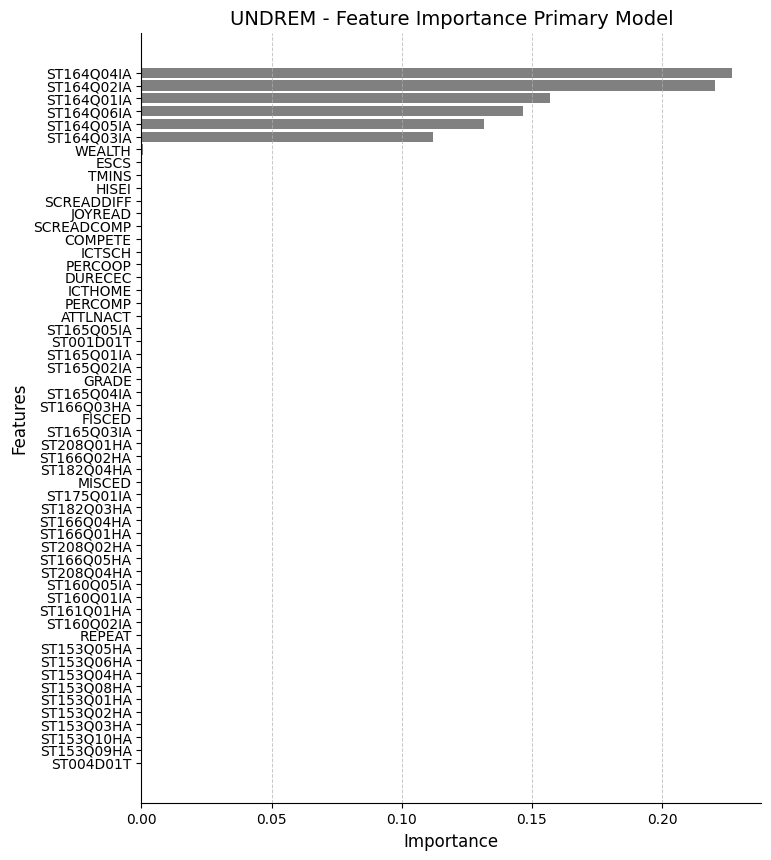

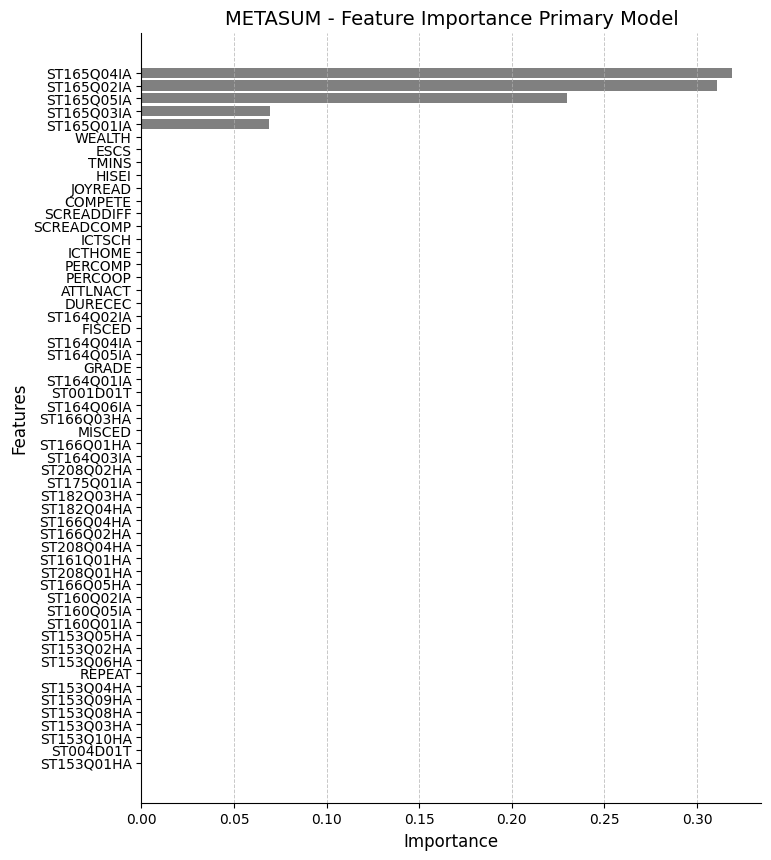

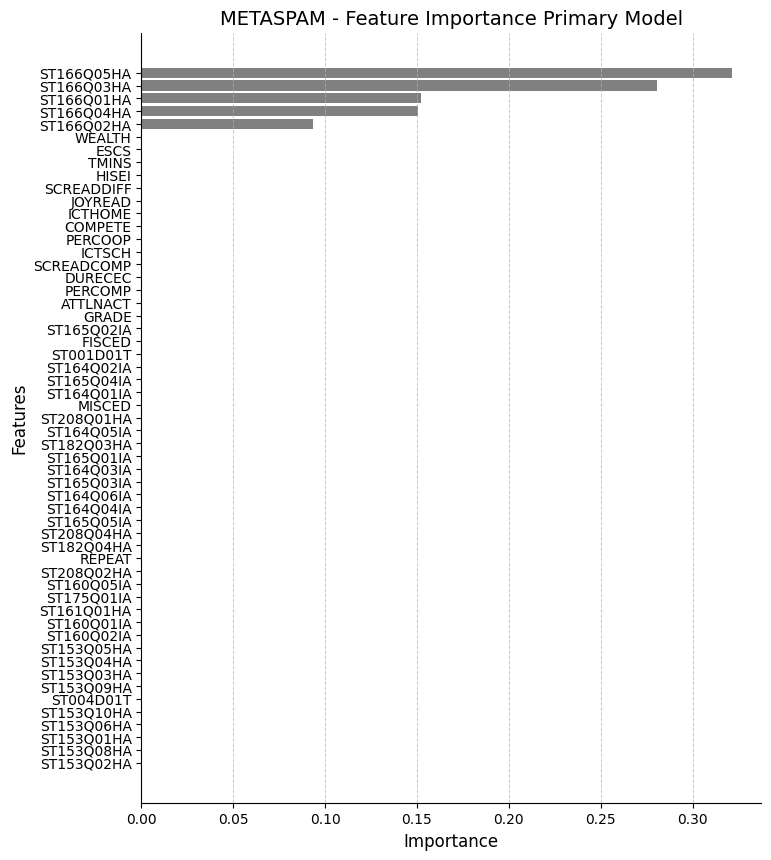

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance Primary Model', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_all_primary.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the models
undrem_feature_importances = model_undrem.feature_importances_
metasum_feature_importances = model_metasum.feature_importances_
metaspam_feature_importances = model_metaspam.feature_importances_

# Assuming X.columns gives you the feature names, call the function for each model
plot_feature_importance(undrem_feature_importances, X.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances, X.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances, X.columns, 'METASPAM')

## Getting the Feature Importance Statistics for All Models

In [ ]:
# Create a DataFrame to hold the feature importance values for the UNDREM model
feature_importance_undrem_df = pd.DataFrame({'Feature': X.columns, 'Importance': undrem_feature_importances})

# Sort the DataFrame by the 'Importance' column in ascending order
feature_importance_undrem_df = feature_importance_undrem_df.sort_values(by='Importance', ascending=True)

# Print the sorted DataFrame
print(feature_importance_undrem_df)

       Feature  Importance
1    ST004D01T    0.000026
9   ST153Q09HA    0.000029
10  ST153Q10HA    0.000029
4   ST153Q03HA    0.000029
3   ST153Q02HA    0.000030
2   ST153Q01HA    0.000030
8   ST153Q08HA    0.000032
5   ST153Q04HA    0.000034
7   ST153Q06HA    0.000036
6   ST153Q05HA    0.000037
42      REPEAT    0.000043
12  ST160Q02IA    0.000051
15  ST161Q01HA    0.000064
11  ST160Q01IA    0.000067
13  ST160Q05IA    0.000074
36  ST208Q04HA    0.000088
31  ST166Q05HA    0.000088
35  ST208Q02HA    0.000092
27  ST166Q01HA    0.000092
30  ST166Q04HA    0.000096
32  ST182Q03HA    0.000097
14  ST175Q01IA    0.000097
38      MISCED    0.000102
33  ST182Q04HA    0.000103
28  ST166Q02HA    0.000104
34  ST208Q01HA    0.000105
24  ST165Q03IA    0.000109
39      FISCED    0.000113
29  ST166Q03HA    0.000117
25  ST165Q04IA    0.000120
37       GRADE    0.000121
23  ST165Q02IA    0.000123
22  ST165Q01IA    0.000125
0    ST001D01T    0.000128
26  ST165Q05IA    0.000133
53    ATTLNACT    0.000186
5

In [ ]:
feature_importance_msum_df = pd.DataFrame({'Feature': X.columns, 'Importance': metasum_feature_importances})
feature_importance_msum_df = feature_importance_msum_df.sort_values(by='Importance', ascending=True)
print(feature_importance_msum_df)

       Feature  Importance
2   ST153Q01HA    0.000008
1    ST004D01T    0.000009
10  ST153Q10HA    0.000009
4   ST153Q03HA    0.000010
8   ST153Q08HA    0.000010
9   ST153Q09HA    0.000011
5   ST153Q04HA    0.000012
42      REPEAT    0.000012
7   ST153Q06HA    0.000013
3   ST153Q02HA    0.000013
6   ST153Q05HA    0.000014
11  ST160Q01IA    0.000024
13  ST160Q05IA    0.000024
12  ST160Q02IA    0.000026
31  ST166Q05HA    0.000029
34  ST208Q01HA    0.000030
15  ST161Q01HA    0.000031
36  ST208Q04HA    0.000031
28  ST166Q02HA    0.000032
30  ST166Q04HA    0.000033
33  ST182Q04HA    0.000033
32  ST182Q03HA    0.000037
14  ST175Q01IA    0.000037
35  ST208Q02HA    0.000038
18  ST164Q03IA    0.000038
27  ST166Q01HA    0.000038
38      MISCED    0.000039
29  ST166Q03HA    0.000040
21  ST164Q06IA    0.000041
0    ST001D01T    0.000042
16  ST164Q01IA    0.000043
37       GRADE    0.000044
20  ST164Q05IA    0.000045
19  ST164Q04IA    0.000045
39      FISCED    0.000047
17  ST164Q02IA    0.000047
4

In [ ]:
feature_importance_mspam_df = pd.DataFrame({'Feature': X.columns, 'Importance': metaspam_feature_importances})
feature_importance_mspam_df = feature_importance_mspam_df.sort_values(by='Importance', ascending=True)
print(feature_importance_mspam_df)

       Feature  Importance
3   ST153Q02HA    0.000009
8   ST153Q08HA    0.000009
2   ST153Q01HA    0.000009
7   ST153Q06HA    0.000010
10  ST153Q10HA    0.000010
1    ST004D01T    0.000010
9   ST153Q09HA    0.000010
4   ST153Q03HA    0.000010
5   ST153Q04HA    0.000012
6   ST153Q05HA    0.000017
12  ST160Q02IA    0.000020
11  ST160Q01IA    0.000022
15  ST161Q01HA    0.000024
14  ST175Q01IA    0.000025
13  ST160Q05IA    0.000026
35  ST208Q02HA    0.000027
42      REPEAT    0.000029
33  ST182Q04HA    0.000029
36  ST208Q04HA    0.000029
26  ST165Q05IA    0.000030
19  ST164Q04IA    0.000030
21  ST164Q06IA    0.000032
24  ST165Q03IA    0.000032
18  ST164Q03IA    0.000032
22  ST165Q01IA    0.000033
32  ST182Q03HA    0.000033
20  ST164Q05IA    0.000034
34  ST208Q01HA    0.000034
38      MISCED    0.000037
16  ST164Q01IA    0.000037
25  ST165Q04IA    0.000037
17  ST164Q02IA    0.000038
0    ST001D01T    0.000041
39      FISCED    0.000041
23  ST165Q02IA    0.000045
37       GRADE    0.000050
5

# Testing the impact of non-cognitive variables

In [ ]:
# Remove Direct Impact Variables
columns_to_remove = ['ST164Q01IA', 'ST164Q02IA', 'ST164Q03IA', 'ST164Q04IA', 'ST164Q05IA', 'ST164Q06IA', 'ST165Q01IA', 'ST165Q02IA', 'ST165Q03IA', 'ST165Q04IA', 'ST165Q05IA', 'ST166Q01HA', 'ST166Q02HA', 'ST166Q03HA', 'ST166Q04HA', 'ST166Q05HA']
X_train_new = X_train.drop(columns=columns_to_remove)

In [ ]:
# Train New Models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem_new = RandomForestRegressor(n_estimators=100)
model_undrem_new.fit(X_train_new, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum_new = RandomForestRegressor(n_estimators=100)
model_metasum_new.fit(X_train_new, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam_new = RandomForestRegressor(n_estimators=100)
model_metaspam_new.fit(X_train_new, y_metaspam_train)

RandomForestRegressor()

In [ ]:
# Validitaning Using Test Set
X_test_new = X_test.drop(columns=columns_to_remove)
y_undrem_pred_test_new = model_undrem_new.predict(X_test_new)
y_metasum_pred_test_new = model_metasum_new.predict(X_test_new)
y_metaspam_pred_test_new = model_undrem_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print performance metrics
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Noncognitive Model: Mean Squared Error-Full Sample: {mse}")
    print(f"{dataset_type} - Noncognitive Model: Mean Absolute Error-Full Sample: {mae}")
    print(f"{dataset_type} - Noncognitive Model: R-squared Score-Full Sample: {r2}")

# Calculate and print performance metrics for new models
print("New UNDREM Model:")
print_metrics(model_undrem_new, X_test_new, y_undrem_test, "Test")

print("\nNew METASUM Model:")
print_metrics(model_metasum_new, X_test_new, y_metasum_test, "Test")

print("\nNew METASPAM Model:")
print_metrics(model_metaspam_new, X_test_new, y_metaspam_test, "Test")

New UNDREM Model:
Test - Noncognitive Model: Mean Squared Error-Full Sample: 0.7521976062031962
Test - Noncognitive Model: Mean Absolute Error-Full Sample: 0.6925006155878894
Test - Noncognitive Model: R-squared Score-Full Sample: 0.1364301064879977

New METASUM Model:
Test - Noncognitive Model: Mean Squared Error-Full Sample: 0.7155142717422563
Test - Noncognitive Model: Mean Absolute Error-Full Sample: 0.6740864063942671
Test - Noncognitive Model: R-squared Score-Full Sample: 0.18188422379435987

New METASPAM Model:
Test - Noncognitive Model: Mean Squared Error-Full Sample: 0.7096506343124473
Test - Noncognitive Model: Mean Absolute Error-Full Sample: 0.6828660327492949
Test - Noncognitive Model: R-squared Score-Full Sample: 0.14980529343770643


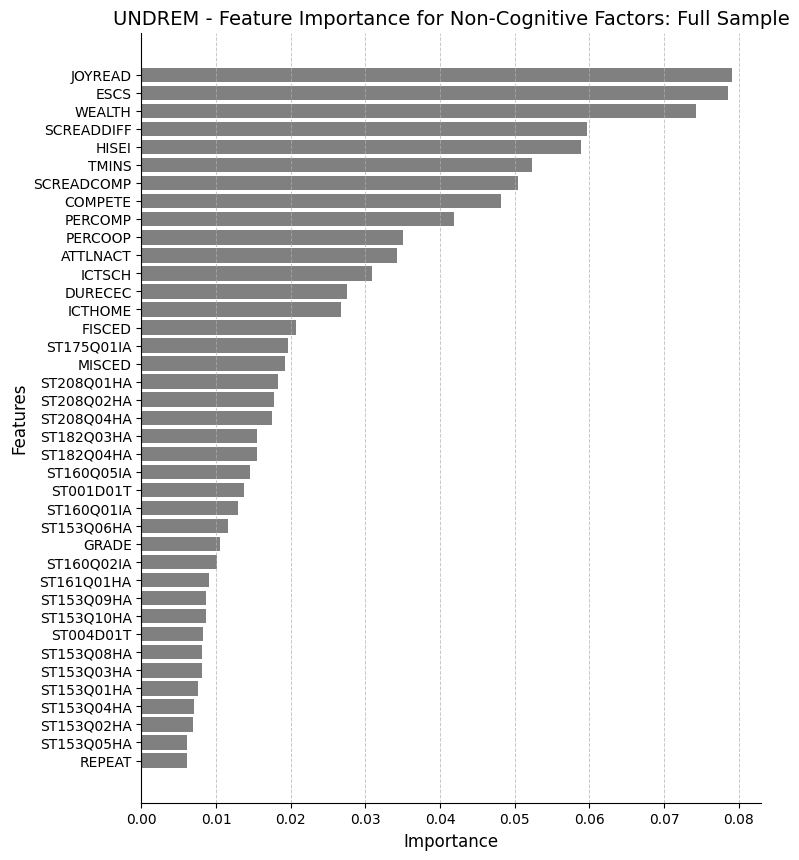

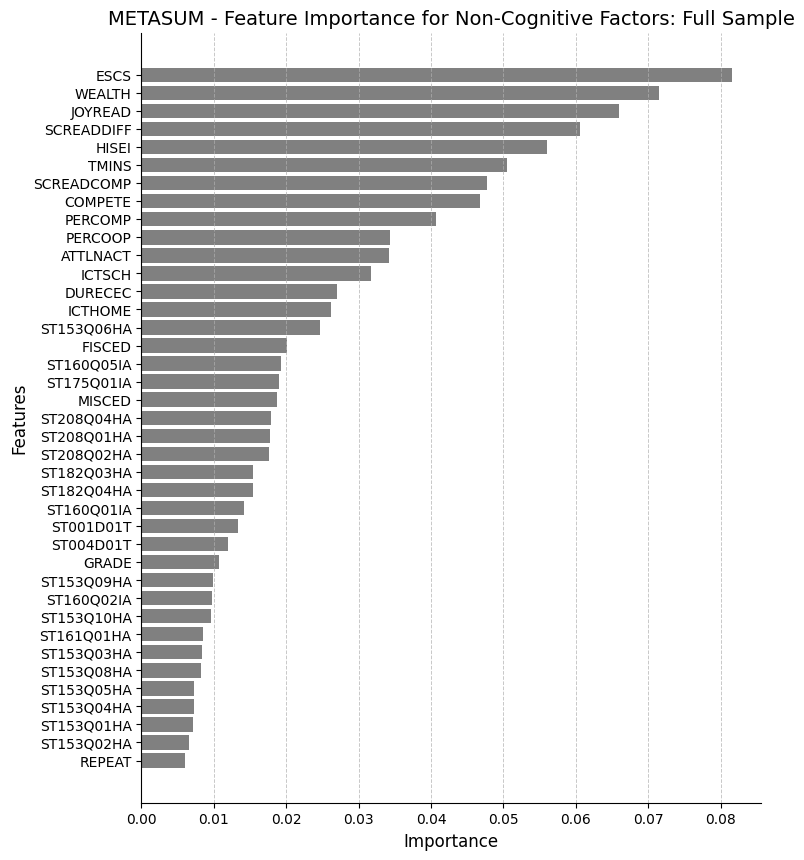

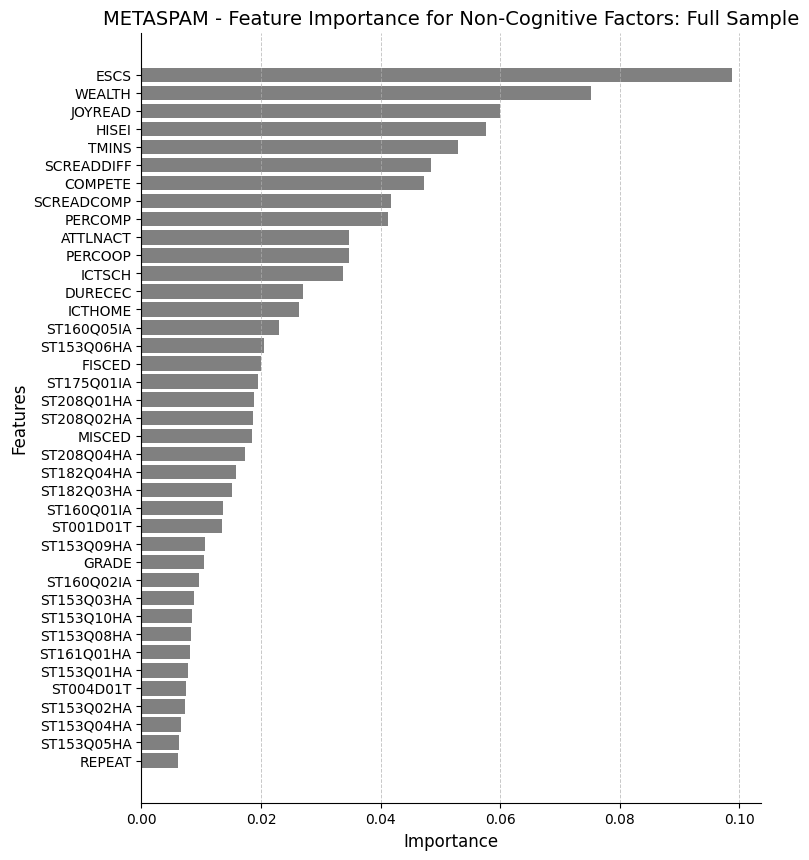

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance for Non-Cognitive Factors: Full Sample', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_non_cognitive_full_sample.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
plot_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'METASPAM')

In [ ]:
# Function to print feature importances
def print_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}")
    print("---------------------------------------")
    print(feature_importance_df)
    print("\n")

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
print_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'New UNDREM')
print_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'New METASUM')
print_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'New METASPAM')

Feature Importance for New UNDREM
---------------------------------------
       Feature  Importance
32     JOYREAD    0.079093
28        ESCS    0.078624
31      WEALTH    0.074301
34  SCREADDIFF    0.059635
24       HISEI    0.058817
27       TMINS    0.052349
33  SCREADCOMP    0.050475
38     COMPETE    0.048232
35     PERCOMP    0.041880
36     PERCOOP    0.035030
37    ATTLNACT    0.034180
30      ICTSCH    0.030895
25     DURECEC    0.027493
29     ICTHOME    0.026797
23      FISCED    0.020750
14  ST175Q01IA    0.019657
22      MISCED    0.019248
18  ST208Q01HA    0.018233
19  ST208Q02HA    0.017722
20  ST208Q04HA    0.017523
16  ST182Q03HA    0.015472
17  ST182Q04HA    0.015458
13  ST160Q05IA    0.014589
0    ST001D01T    0.013689
11  ST160Q01IA    0.012944
7   ST153Q06HA    0.011617
21       GRADE    0.010488
12  ST160Q02IA    0.010192
15  ST161Q01HA    0.008994
9   ST153Q09HA    0.008671
10  ST153Q10HA    0.008632
1    ST004D01T    0.008185
8   ST153Q08HA    0.008165
4   ST15